# Shallow Neural Network in TensorFlow

Build a shallow neural network to classify handwritten digits

#### Load dependencies

In [1]:
import tensorflow
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from matplotlib import pyplot as plt

#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data() # X - inputs, y - outputs

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

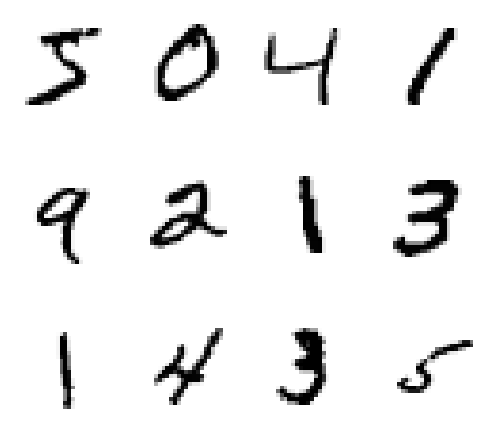

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

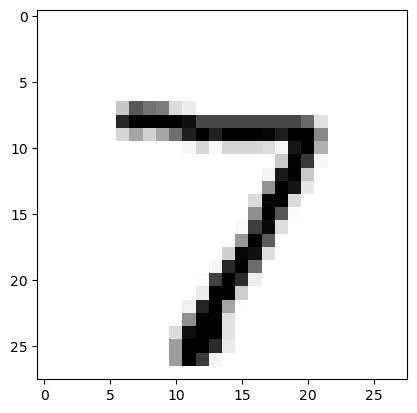

In [9]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [13]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [14]:
X_train /= 255 # 输入数据的定义域从[0,255]压缩到[0,1]
X_valid /= 255

In [15]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [16]:
n_classes = 10
y_train = to_categorical(y_train, n_classes)
y_valid = to_categorical(y_valid, n_classes)

In [23]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design NN arch

In [24]:
model = Sequential()

# hidden layer:
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))

# output layer:
model.add(Dense(10, activation='softmax'))

In [25]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


#### Compile model

In [27]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy']) # SGD: stochastic gradient descent,随机梯度下降法

#### Train!

In [28]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Epoch 1/200
469/469 [==============================] - 1s 2ms/step - loss: 0.0928 - accuracy: 0.1044 - val_loss: 0.0917 - val_accuracy: 0.1267
Epoch 2/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0911 - accuracy: 0.1571 - val_loss: 0.0906 - val_accuracy: 0.1758
Epoch 3/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0902 - accuracy: 0.1860 - val_loss: 0.0898 - val_accuracy: 0.1928
Epoch 4/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0896 - accuracy: 0.1973 - val_loss: 0.0893 - val_accuracy: 0.2022
Epoch 5/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0891 - accuracy: 0.2049 - val_loss: 0.0888 - val_accuracy: 0.2099
Epoch 6/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0886 - accuracy: 0.2192 - val_loss: 0.0883 - val_accuracy: 0.2312
Epoch 7/200
469/469 [==============================] - 1s 1ms/step - loss: 0.0882 - accuracy: 0.2420 - val_loss: 0.0879 - val_accuracy: 0.2596

#### Evaluating model performance

In [29]:
model.evaluate(X_valid, y_valid)

313/313 [==============================] - 0s 702us/step - loss: 0.0270 - accuracy: 0.8710


[0.027015594765543938, 0.8709999918937683]

In [30]:
valid0 = X_valid[0].reshape(1, 784)

In [34]:
predict_0 = model.predict(valid0)

1/1 [==============================] - 0s 12ms/step


In [35]:
import numpy as np
np.argmax(predict_0,axis=1)

array([7], dtype=int64)